
#Introduction


Domain: E-commerce
Context:

Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar features on all other eCommerce sites.


This notebook will offer a recommendation system that recommends products based on user habits.

##1-download the datasets

In [ ]:
# install tensorflow recommender 
!pip install -q tensorflow-recommenders

     |████████████████████████████████| 85 kB 2.4 MB/s 
     |████████████████████████████████| 462 kB 33.3 MB/s 


#2- Import the necessary libraries

In [ ]:
#import Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_recommenders as tfrs
import numpy as np
from sklearn import model_selection

#3- Download the dataset

In [ ]:
# download the required dataset from kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:

!kaggle datasets download -d prokaggler/amazon-electronic-product-recommendation

 92% 101M/109M [00:01<00:00, 73.7MB/s] 
100% 109M/109M [00:01<00:00, 70.4MB/s]


In [ ]:
!unzip '/content/amazon-electronic-product-recommendation.zip'

Archive:  /content/amazon-electronic-product-recommendation.zip
  inflating: ratings_Electronics (1).csv  


#4- Preprocessing the Data

In [ ]:
#load dataset 
data=pd.read_csv('/content/ratings_Electronics (1).csv',names=['userId', 'productId','rating','timestamp'])

In [ ]:
data

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [ ]:
# Taking 10% of the dataset
data=data.loc[:500000]

In [ ]:
data

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
499996,A2NFFW6WDXBVZ8,B0002OZXHO,4.0,1137196800
499997,A1QEUB3ABULQOG,B0002OZXHO,4.0,1111104000
499998,A2OYA4KEWWMORF,B0002OZXHO,5.0,1110672000
499999,A2TQJ6GJCNPVGA,B0002OZXHO,5.0,1107388800


In [ ]:
#describe a DataFream and info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500001 entries, 0 to 500000
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     500001 non-null  object 
 1   productId  500001 non-null  object 
 2   rating     500001 non-null  float64
 3   timestamp  500001 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


,rating,timestamp
count,500001.000000,5.000010e+05
mean,3.987006,1.236762e+09
std,1.396387,1.274056e+08
min,1.000000,9.127296e+08
25%,3.000000,1.132272e+09
50%,5.000000,1.255478e+09
75%,5.000000,1.358122e+09
max,5.000000,1.406074e+09


In [ ]:
# Check the presence of missing values
data.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [ ]:
# Remove rating and timestamp columns
data.drop(labels=['rating','timestamp'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data

,userId,productId
0,AKM1MP6P0OYPR,0132793040
1,A2CX7LUOHB2NDG,0321732944
2,A2NWSAGRHCP8N5,0439886341
3,A2WNBOD3WNDNKT,0439886341
4,A1GI0U4ZRJA8WN,0439886341
...,...,...
499996,A2NFFW6WDXBVZ8,B0002OZXHO
499997,A1QEUB3ABULQOG,B0002OZXHO
499998,A2OYA4KEWWMORF,B0002OZXHO
499999,A2TQJ6GJCNPVGA,B0002OZXHO


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname UHVCX identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


KeyboardInterrupt: ignored

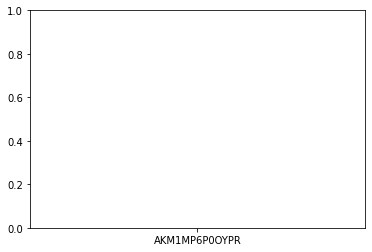

In [ ]:
#show the histogram
plt.hist(data)

In [ ]:
#Convert text values to numerical values
def create_unique_id(dataset):
  unique_id={}
  id_unique={}
  for id,data in enumerate(set(dataset)):
    unique_id[bytes(data,'utf-8')]=id+1
    id_unique[id+1]=bytes(data,'utf-8')

  return unique_id,id_unique

In [ ]:
#Number of unique user id 
user_id,id_user=create_unique_id(data.userId)
#number product id in the data
product_id,id_product=create_unique_id(data.productId)

In [ ]:
# candidates product ids 
candidates_products = data.productId.unique()

In [ ]:
candidates_products.shape

In [ ]:
# convert to numeric valus 
def converter_users_product(x1,x2):
  x1=user_id[x1.numpy()]
  x2=product_id[x2.numpy()]
  return x1,x2
def converter_product(x):
  x=product_id[x.numpy()]
  return x  

#5- Pipeline

In [ ]:
#create pipline

def pipline_data(user_ids=None,product_ids=None):

  if type(user_ids) !=type(None) and type(product_ids) !=type(None):

    data=tf.data.Dataset.from_tensor_slices(((user_ids,product_ids)))
    data=data.shuffle(500000)
    data=data.map(lambda x1,x2 :tf.py_function(converter_users_product,[x1,x2],
                                               Tout=[tf.int32,tf.int32]),num_parallel_calls=tf.data.AUTOTUNE)
    # batch size was 64
    data=data.batch(batch_size=8192)
    

  else:
    
    data=tf.data.Dataset.from_tensor_slices(product_ids)
    data=data.map(lambda x:tf.py_function(converter_product,[x],Tout=tf.int32),num_parallel_calls=tf.data.AUTOTUNE)
    # batch size was 64 and 4096
    data=data.batch(batch_size=128)
    
  data=data.prefetch(tf.data.AUTOTUNE) 
  return data


inputs_data_pipeline= pipline_data(data.userId,data.productId)
candidates_products_pipeline = pipline_data (product_ids=candidates_products)

In [ ]:
for x1,x2 in inputs_data_pipeline.take(1):
  print(x1)
  print(x2)
for x in candidates_products_pipeline.take(1):
    print(x)

#Modeling

In [ ]:
users_unique_length = len(set(data.userId))
class UserModel(tf.keras.Model):
  def __init__(self, users_unique_length, **kwargs):
    super(UserModel,self).__init__(**kwargs)
    
    self.embedding = tf.keras.layers.Embedding(users_unique_length+1, 32, mask_zero=True)

  def call(self, x):
    x=self.embedding(x)
    return x

In [ ]:
products_unique_length = len(set(data.productId))
class ProductModel(tf.keras.Model):
  def __init__(self, users_unique_length, **kwargs):
    super(ProductModel,self).__init__(**kwargs)
    
    self.embedding = tf.keras.layers.Embedding(products_unique_length+1, 32, mask_zero=True)

  def call(self, x):
    
    x=self.embedding(x)
    return x

In [ ]:
user_model = UserModel(users_unique_length, name = 'user_model')
product_model = ProductModel(products_unique_length, name = 'product_model')

In [ ]:
for x1,x2 in inputs_data_pipeline.take(1):
  print(x1)
  pred = user_model(x1)

In [ ]:
for i in candidates_products_pipeline.take(1):
  print(i)
  pred = product_model(i)

In [ ]:
metrics = tfrs.metrics.FactorizedTopK(candidates=candidates_products_pipeline.map(product_model))

In [ ]:
task = tfrs.tasks.Retrieval(metrics=metrics)

In [ ]:
class RetrievalModel(tfrs.Model):
  def __init__(self, user_model, product_model, task):
    super(RetrievalModel,self).__init__()

    self.user_model = user_model
    self.product_model = product_model
    self.task = task
  def compute_loss(self, features, training=False):
    user_embeddings = self.user_model(features[0])
    movie_embeddings = self.product_model(features[1])

    loss = self.task(user_embeddings, movie_embeddings)
    return loss


In [ ]:
model = RetrievalModel(user_model, product_model, task)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

In [ ]:
model.fit(inputs_data_pipeline, epochs=10)

Epoch 1/10
62/62 [==============================] - 680s 11s/step - factorized_top_k/top_1_categorical_accuracy: 2.4000e-05 - factorized_top_k/top_5_categorical_accuracy: 2.8000e-04 - factorized_top_k/top_10_categorical_accuracy: 4.8600e-04 - factorized_top_k/top_50_categorical_accuracy: 0.0021 - factorized_top_k/top_100_categorical_accuracy: 0.0041 - loss: 72386.5905 - regularization_loss: 0.0000e+00 - total_loss: 72386.5905
Epoch 2/10
62/62 [==============================] - 640s 10s/step - factorized_top_k/top_1_categorical_accuracy: 0.0563 - factorized_top_k/top_5_categorical_accuracy: 0.2570 - factorized_top_k/top_10_categorical_accuracy: 0.3401 - factorized_top_k/top_50_categorical_accuracy: 0.5130 - factorized_top_k/top_100_categorical_accuracy: 0.5751 - loss: 49140.7057 - regularization_loss: 0.0000e+00 - total_loss: 49140.7057
Epoch 3/10
62/62 [==============================] - 639s 10s/step - factorized_top_k/top_1_categorical_accuracy: 0.1949 - factorized_top_k/top_5_categor

In [ ]:
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)

index.index_from_dataset(
    tf.data.Dataset.zip(
        (candidates_products_pipeline, candidates_products_pipeline.map(model.product_model))
    )
)

# Get recommendations.
_, titles = index(tf.constant([44695]))
print("Recommendations:")
for id in titles.numpy()[0]:

    print(id_product[id])

NameError: ignored

In [ ]:
tf.saved_model.save(index,'/content/drive/MyDrive/saved/my_model_1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# this will load the model from the drive
index = tf.saved_model.load('/content/drive/MyDrive/saved/my_model_1/')


In [ ]:
tf.saved

AttributeError: ignored

In [ ]:
_, titles = index(tf.constant([44695]))
print("Recommendations:")
for id in titles.numpy()[0]:

    print(id_product[id].decode("utf-8"))

Recommendations:


NameError: ignored

# gradio

In [ ]:
!pip install gradio
!pip install beautifulsoup4

     |████████████████████████████████| 2.9 MB 4.3 MB/s 
     |████████████████████████████████| 2.0 MB 41.4 MB/s 
     |████████████████████████████████| 211 kB 60.7 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 84 kB 2.7 MB/s 
     |████████████████████████████████| 253 kB 66.1 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 44.6 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 51.2 MB/s 
     |████████████████████████████████| 144 kB 78.1 MB/s 
     |████████████████████████████████| 10.9 MB 38.5 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
     |████████████████████████████████| 79 kB 6.2 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 856 kB 72.4 MB/s 
     |████████████████████████████████| 61 kB 360 kB/s 
     |████████████████████████

In [ ]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import gradio as gr
import csv

In [ ]:
data_csv = []

In [ ]:
with open('/content/result.csv', 'r') as file:
  csv_reader = csv.reader(file)
  for line in csv_reader:
    data_csv.append(line)

FileNotFoundError: ignored

In [ ]:
len(data_csv)

10001

In [ ]:
cleaned_data = []
for i in data_csv:
  if i[2] != '' or i[3] != '':
    cleaned_data.append(i)

In [ ]:
len(cleaned_data)

2912

## function to get data from amazon

In [ ]:
def get_data(recommended):
  results = []
  for i in recommended:
    done = False
    
    for line in cleaned_data:
      if i == line[0]:
        results.append([line[3], line[2]])
        done = True
        break
    if done == False:
      url = 'https://www.amazon.com/dp/' + i
      headers = {
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
          }
      for j in range(10):
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        try:
          title = soup.find('h1', id='title').text
          title = title.rstrip().lstrip()
          image = soup.find('img', id='landingImage')['src']
          results.append([image, title])
          cleaned_data.append([i, url, title, image])
          break
        except:
          ''
        
        if j >= 9:
          break
  return results

## The gradio app


In [ ]:
def recommend(user_id):
  # the function to retrive best items
  info = []
  _, titles = index(tf.constant([int(user_id)]))
  
  for id in titles.numpy()[0]:
    info.append(id_product[id].decode("utf-8"))

  result = get_data(info)
  return result

gr.Interface(
    fn = recommend,
    inputs = [
              gr.inputs.Textbox(label='Enter User Id'),
    ],
    outputs = [
               gr.outputs.Carousel(["image", "text"], label="recommended products"),
               ],
    title = 'Recommendor',
    description='This program predicts the user recommended products',
    flagging_options=[
                      'Incorrect  User',
                      'Bad Interface',
                      'wrong Image'
    ],
    flagging_dir="/content/flagged/Recommendor",
    theme= None,
    examples=[
              ['44695'],
              ['1821831'],
              ['6933420'],
              ['2042'],
              ['451227'],
              ['6616'],
    ],
).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://54446.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fb805139590>,
 'http://127.0.0.1:7861/',
 'https://54446.gradio.app')

In [ ]:
len(cleaned_data)

2912